In [31]:
#!pip install tensorflow

In [43]:
import pandas as pd
import pandas_datareader as web
import numpy as np
import math
import datetime as dt
from datetime import timedelta
from  matplotlib import pyplot as plt
plt.style.use =('fivethirtyeight')

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dropout


In [44]:
company = 'NFLX'
start = dt.datetime(2012,1,1)
end = dt.datetime(2022,1,1)
df = web.DataReader(company, 'yahoo', start, end)

In [45]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,10.388571,10.018571,10.040000,10.320000,29213800.0,10.320000
2012-01-04,11.567143,10.258571,10.335714,11.492857,100489900.0,11.492857
2012-01-05,11.694286,11.040000,11.345714,11.328571,86552900.0,11.328571
2012-01-06,12.471429,11.242857,11.302857,12.327143,125610800.0,12.327143
2012-01-09,14.235714,12.448571,12.801429,14.025714,214073300.0,14.025714


In [46]:
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-17,593.250000,581.739990,591.609985,586.729980,4386900.0,586.729980
2021-12-20,602.880005,584.260010,586.429993,593.739990,3358400.0,593.739990
2021-12-21,607.820007,593.859985,597.539978,604.919983,2319400.0,604.919983
2021-12-22,614.820007,602.630005,603.359985,614.239990,2335700.0,614.239990
2021-12-23,616.880005,607.570007,616.400024,614.090027,1621100.0,614.090027
2021-12-27,615.000000,609.250000,615.000000,613.119995,2061500.0,613.119995
2021-12-28,618.409973,609.690002,614.950012,610.710022,1882800.0,610.710022
2021-12-29,613.979980,604.679993,610.710022,610.539978,1287200.0,610.539978
2021-12-30,620.609985,611.239990,612.989990,612.090027,1625100.0,612.090027


In [47]:
df.shape

(2517, 6)

<function matplotlib.pyplot.show(close=None, block=None)>

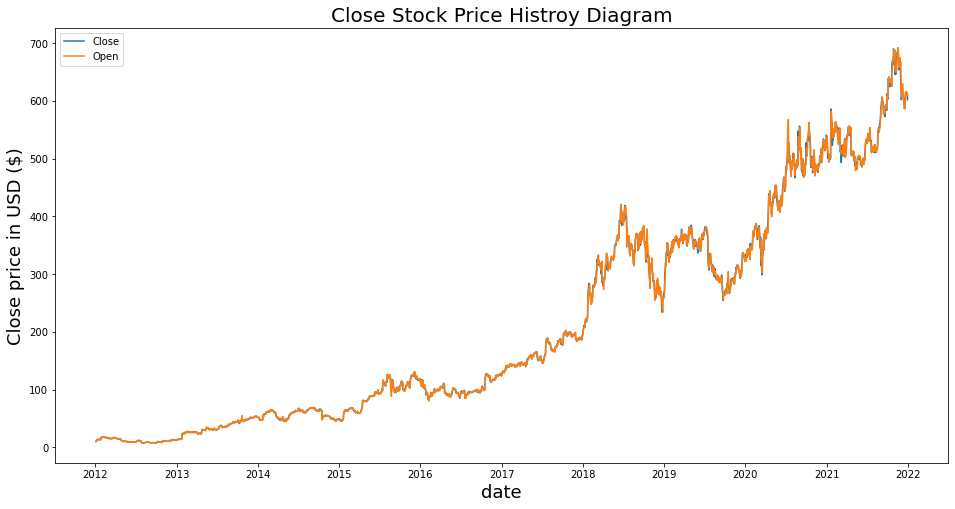

In [48]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'])
plt.plot(df['Open'])
plt.legend(['Close','Open'], loc='upper left')
plt.xlabel('date', fontsize=18)
plt.title('Close Stock Price Histroy Diagram', fontsize=20)
plt.ylabel('Close price in USD ($)', fontsize=18)
plt.show

In [49]:

df.shape

(2517, 6)

In [50]:
#scalling the data / converting data between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))

In [51]:
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1,1))

In [52]:
#spliting data into trainset and test set
prediction_days = 60
x_train = []
y_train = []

for i in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[i-prediction_days:i,0])
    y_train.append(scaled_data[i,0])
    if i<=prediction_days:
        print(x_train)
        print(y_train)

[array([0.00385127, 0.00556596, 0.00532578, 0.00678567, 0.00926895,
       0.00877814, 0.00800956, 0.00800956, 0.0084753 , 0.00854631,
       0.00934414, 0.0103717 , 0.00969919, 0.00838758, 0.00811816,
       0.00861315, 0.01299282, 0.0146177 , 0.01496022, 0.01386792,
       0.01444644, 0.01466156, 0.01516908, 0.01575805, 0.01547192,
       0.01466156, 0.014837  , 0.01464694, 0.01347109, 0.01446733,
       0.01425639, 0.01422506, 0.01421253, 0.01328313, 0.01223885,
       0.01236208, 0.01208639, 0.01161438, 0.012431  , 0.01189007,
       0.01231195, 0.01280276, 0.01190678, 0.01113819, 0.01073302,
       0.01133452, 0.0115559 , 0.01094396, 0.01097529, 0.01074555,
       0.01177311, 0.01172925, 0.01264194, 0.01278605, 0.01384703,
       0.0135609 , 0.01386583, 0.01424177, 0.01396608, 0.01357761])]
[0.012792318847363655]


In [53]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [54]:
x_train.shape, y_train.shape

((2457, 60), (2457,))

In [55]:
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))

In [56]:
x_train.shape


(2457, 60, 1)

In [59]:
#building the model
model = Sequential()

model.add(LSTM(units=50, return_sequences = True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences= True ))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences= True ))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))


model.add(Dense(1))

In [62]:
model.compile(optimizer='adam', loss ='mean_squared_error', metrics= 'accuracy')

In [ ]:
model.fit(x_train, y_train ,batch_size=32 , epochs=10)

Epoch 1/10
58/77 [=====================>........] - ETA: 3s - loss: 0.0022 - accuracy: 0.0011

In [32]:
# creating test data
test_start = dt.datetime(2020,1,1)
test_end = dt.datetime.now()
test_data = web.DataReader(company, 'yahoo', test_start, test_end)

actual_price = test_data['Close'].values
total_dataset = pd.concat((df['Close'], test_data['Close']), axis=0)


In [33]:
model_inputs = total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values

model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)


In [34]:
x_test=[]

for i in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[i-prediction_days:i,0])


x_test = np.array(x_test)
x_test = np.reshape(x_test,( x_test.shape[0], x_test.shape[1],1))


In [35]:
predicted_price = model.predict(x_test)
predicted_price = scaler.inverse_transform(predicted_price)

<function matplotlib.pyplot.show(close=None, block=None)>

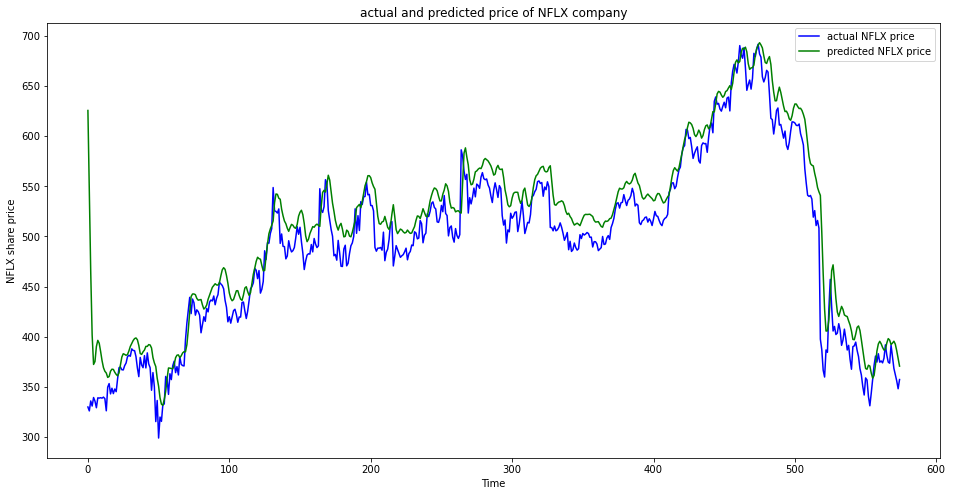

In [36]:
plt.figure(figsize=(16,8))
plt.plot(actual_price, color='blue', label=f"actual {company} price")
plt.plot(predicted_price, color='green', label=f"predicted {company} price")
plt.title(f"actual and predicted price of {company} company" )
plt.xlabel('Time')
plt.ylabel(f"{company} share price")
plt.legend()
plt.show

# predict the next day

In [41]:
real_data =[model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs +1), 0 ]]

real_data = np.array(real_data)
real_data = np.reshape(real_data,( real_data.shape[0], real_data.shape[1], 1))

real_data.shape

(1, 59, 1)

In [42]:
prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)



yesterday_data = actual_price[-1]
yesterday_date = dt.datetime.now() - timedelta(days=1)

print(f"Yesterdays Price: {yesterday_data}", yesterday_date)
print(f"Prediction Price: {prediction}", dt.datetime.now())

Yesterdays Price: 357.17999267578125 2022-04-11 17:07:38.276967
Prediction Price: [[368.22986]] 2022-04-12 17:07:38.277500


In [1368]:
'''appel_quoto = web.DataReader('AAPL', 'yahoo', test_start, test_end)
new_df = appel_quoto.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test=[]
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)
'''

"appel_quoto = web.DataReader('AAPL', 'yahoo', test_start, test_end)\nnew_df = appel_quoto.filter(['Close'])\nlast_60_days = new_df[-60:].values\nlast_60_days_scaled = scaler.transform(last_60_days)\nX_test=[]\nX_test.append(last_60_days_scaled)\nX_test = np.array(X_test)\nX_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))\npred_price = model.predict(X_test)\npred_price = scaler.inverse_transform(pred_price)\nprint(pred_price)\n"

In [1369]:
#yesterday = dt.datetime.now() - timedelta(days=1)
#apple_quat2 = web.DataReader('AAPL', 'yahoo', yesterday, test_end)
#yesterday = new_df[-1:]
#print(apple_quat2['Close'])

In [1370]:
model.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_115 (LSTM)             (None, 60, 50)            10400     
                                                                 
 dropout_81 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_116 (LSTM)             (None, 60, 50)            20200     
                                                                 
 dropout_82 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_117 (LSTM)             (None, 50)                20200     
                                                                 
 dropout_83 (Dropout)        (None, 50)                0         
                                                                 
 dense_62 (Dense)            (None, 1)               